<a href="https://colab.research.google.com/github/talktokorea/DeepLearningBrowser/blob/master/06_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

6.6 완전연결층과 타이타닉 데이터


In [7]:
from keras.models import Sequential
from keras import layers
from keras import optimizers
import tensorflow as tf

In [8]:
model = Sequential()
model.add(layers.Dense(units=8, activation='relu'))
model.add(layers.Dense(units=16, activation='relu'))
model.add(layers.Dense(units=32, activation='relu'))
model.add(layers.Dense(units=64, activation='relu'))
model.add(layers.Dense(units=2, activation='softmax'))

In [28]:
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])
#model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001), metrics=['accuracy'])

In [29]:
# 실행을 위한 코드 추가
import numpy as np
import pandas as pd

from google.colab import files
from google.colab import drive

files.upload()
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/*
drive.mount('/content/gdrive')

Saving kaggle.json to kaggle.json
mkdir: cannot create directory ‘/root/.kaggle’: File exists
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [30]:
# 실행을 위한 코드 추가
import pandas as pd

data_train = pd.read_csv('./gdrive/MyDrive/Colab Notebooks/data/train.csv')
data_test = pd.read_csv('./gdrive/MyDrive/Colab Notebooks/data/test.csv')

import numpy as np
from tensorflow.keras.utils import to_categorical 
data_train_np = np.zeros([891,8])
ata_train_np = np.zeros([data_train.shape[0],8])
data_train_np[:,2:5] = to_categorical(data_train['Pclass'].to_numpy()-1)
data_train_np[:,5] = data_train['Age']/80
data_train_np[:,6] = data_train['SibSp']/10
data_train_np[:,7] = data_train['Parch']/10
data_train_np[np.isnan(data_train_np)] = 30/80

data_train_np_y = to_categorical(data_train['Survived'])

In [31]:
hist = model.fit(data_train_np,data_train_np_y,epochs= 400, batch_size=128, validation_split=0.3)

Epoch 1/400
5/5 [==============================] - 1s 45ms/step - loss: 0.5658 - accuracy: 0.7239 - val_loss: 0.5317 - val_accuracy: 0.7724
Epoch 2/400
5/5 [==============================] - 0s 9ms/step - loss: 0.5630 - accuracy: 0.7287 - val_loss: 0.5276 - val_accuracy: 0.7687
Epoch 3/400
5/5 [==============================] - 0s 12ms/step - loss: 0.5577 - accuracy: 0.7271 - val_loss: 0.5357 - val_accuracy: 0.7575
Epoch 4/400
5/5 [==============================] - 0s 8ms/step - loss: 0.5566 - accuracy: 0.7239 - val_loss: 0.5346 - val_accuracy: 0.7687
Epoch 5/400
5/5 [==============================] - 0s 9ms/step - loss: 0.5570 - accuracy: 0.7271 - val_loss: 0.5328 - val_accuracy: 0.7724
Epoch 6/400
5/5 [==============================] - 0s 8ms/step - loss: 0.5556 - accuracy: 0.7287 - val_loss: 0.5292 - val_accuracy: 0.7724
Epoch 7/400
5/5 [==============================] - 0s 8ms/step - loss: 0.5563 - accuracy: 0.7287 - val_loss: 0.5263 - val_accuracy: 0.7724
Epoch 8/400
5/5 [========

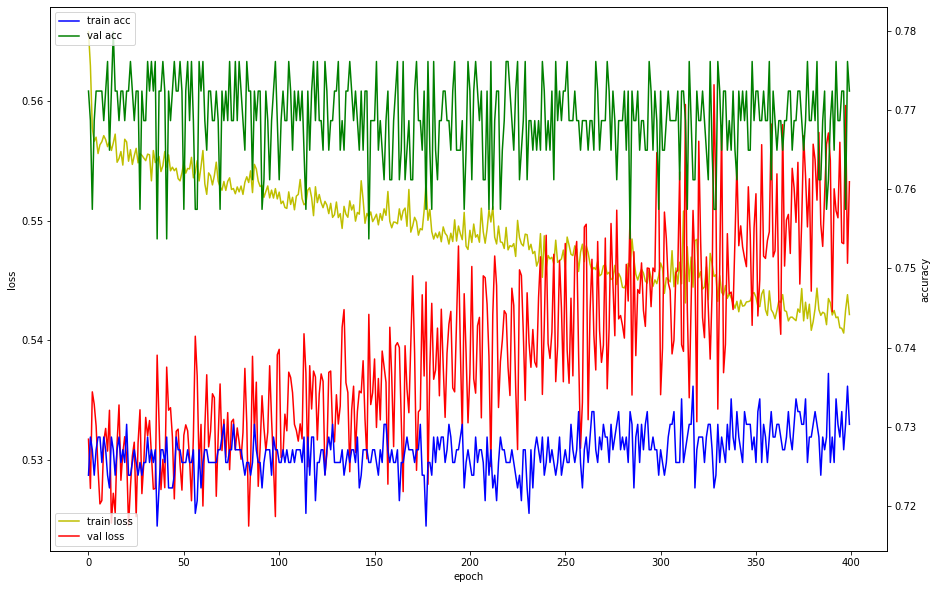

In [33]:
import matplotlib.pyplot as plt

def drawHistory(hist):
  fig = plt.figure(figsize=(15,10)) # 10x15 크기의 figure 생성
  loss_ax = plt.gca()        # figure의 기본 축 가져오기
  acc_ax = loss_ax.twinx()      # 축을 1개 더 추가

  #손실 변화 양상을 그래프로 표시
  loss_ax.plot(hist.history['loss'], 'y', label='train loss')
  loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
  loss_ax.set_xlabel('epoch')
  loss_ax.set_ylabel('loss')
  loss_ax.legend(loc='lower left')

  #정확도 변화 양상을 그래프로 표시
  acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
  acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')
  acc_ax.set_ylabel('accuracy')
  acc_ax.legend(loc='upper left')

  plt.show() #그래프를 화면에 그림

drawHistory(hist) #학습 경과를 그래프로 그리는 함수 호출

In [17]:
# 실행을 위한 코드 추가
from tensorflow.keras.utils import to_categorical 

cnt = 0
sex_num = np.zeros(data_test.shape[0])

data_test_np = np.zeros([data_test.shape[0],8])  # 비어있는 numpy 배열 생성
data_test_np[:,0:2] = to_categorical(sex_num)
data_test_np[:,2:5] = to_categorical(data_test['Pclass'].to_numpy()-1)

for d in data_test['Sex']:
  if(d == 'female'):
    sex_num[cnt] = 1
    cnt = cnt +1

#나이, 형제/배우자수, 부모/자녀수 정규화
data_test_np[:,5] = data_test['Age']/80
data_test_np[:,6] = data_test['SibSp']/10
data_test_np[:,7] = data_test['Parch']/10

#nan값의 처리
data_test_np[np.isnan(data_test_np)] = 30/80

In [18]:
o = model.predict(data_test_np)

In [19]:
o = np.argmax(o,-1)

In [20]:
answer = np.zeros([418,2])
answer[:,0] = data_test['PassengerId']
answer[:,1] = o

In [21]:
df_answer = pd.DataFrame(answer) # 배열 answer를 판다스 라이브러리의 DataFrame 
                                 # 형식으로 변환하고, df_frame 변수에 저장한다.
df_answer.columns =['PassengerID','Survived']       # 각 열의 제목을 지정한다.
df_answer = df_answer.astype('int32')               # 데이터를 정수형으로 바꾼다.
df_answer.to_csv('test_pridict.csv', index = False) # 결과를 csv 파일로 저장한다. 
                                                    # (index는 제외한다)

In [22]:
!kaggle competitions submit -c titanic -f 'test_pridict.csv' -m "Message"

100% 2.77k/2.77k [00:04<00:00, 588B/s]
Successfully submitted to Titanic - Machine Learning from Disaster